In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

df = pd.read_csv('student_records.csv', encoding='utf-8')
df.head()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No


In [3]:
df[['Name', 'OverallGrade']].head()

,Name,OverallGrade
0,Henry,A
1,John,C
2,David,F
3,Holmes,B
4,Marvin,E


In [6]:
df[['ProjectScore', 'ResearchScore']].describe()

,ProjectScore,ResearchScore
count,8.000000,8.000000
mean,53.125000,63.375000
std,24.752705,31.640559
min,17.000000,10.000000
25%,32.250000,50.000000
50%,55.000000,75.000000
75%,73.000000,86.250000
max,85.000000,92.000000


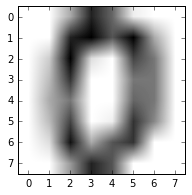

In [12]:
from sklearn import datasets
digits = datasets.load_digits()
plt.figure(figsize= (3,3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [13]:
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [14]:
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [16]:
digits.target[10]

0

In [19]:
X_digits = digits.data
y_digits = digits.target
num_data_points = len(X_digits)

X_train = X_digits[:int(.7 * num_data_points)]
y_train = y_digits[:int(.7 * num_data_points)]
X_test = X_digits[int(.7 * num_data_points):]
y_test = y_digits[int(.7 * num_data_points):]


In [24]:

from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)


/home/grace/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/grace/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
print('Logistic Regression mean accuracy: %f' % logistic.score(X_test, y_test))

Logistic Regression mean accuracy: 0.900000


In [26]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(X)
labels = km.labels_
centers = km.cluster_centers_
print(labels[:10])

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[1 1 1 0 1 0 1 0 0 0]


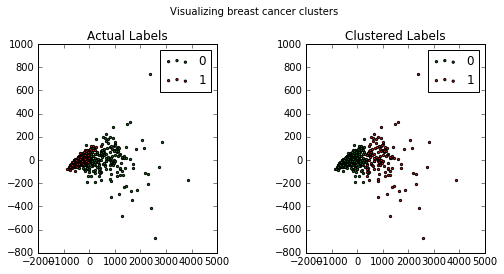

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
bc_pca = pca.fit_transform(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Visualizing breast cancer clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)
ax1.set_title('Actual Labels')
ax2.set_title('Clustered Labels')
for i in range(len(y)):
    if y[i] == 0:
        c1 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if y[i] == 1:
        c2 = ax1.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
    if labels[i] == 0:
        c3 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='g', marker='.')
    if labels[i] == 1:
        c4 = ax2.scatter(bc_pca[i,0], bc_pca[i,1],c='r', marker='.')
l1 = ax1.legend([c1, c2], ['0', '1'])
l2 = ax2.legend([c3, c4], ['0', '1'])    

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(suppress=True)
Z = linkage(X, 'ward')
print(Z)

[[  287.           336.             3.81596727     2.        ]
 [  106.           420.             4.11664267     2.        ]
 [   55.           251.             4.93361024     2.        ]
 ...
 [ 1130.          1132.          6196.07482529    86.        ]
 [ 1131.          1133.          8368.99225244   483.        ]
 [ 1134.          1135.         18371.10293626   569.        ]]


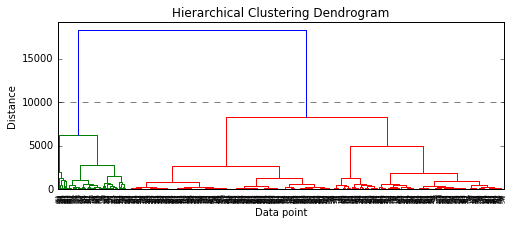

In [30]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=10000, c='k', ls='--', lw=0.5)
plt.show()

In [33]:
from scipy.cluster.hierarchy import fcluster
max_dist = 10000
hc_labels = fcluster(Z, max_dist, criterion='distance')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [36]:
# confusion matrix
from sklearn import linear_model
# train and build the model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)
# predict on test data and view confusion matrix
import model_evaluation_utils as meu
y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

/home/grace/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ImportError: No module named 'model_evaluation_utils'